# ITS307 Data Analytics : Autumn Semester 2022
# Practical 10 

# Evaluation metrics

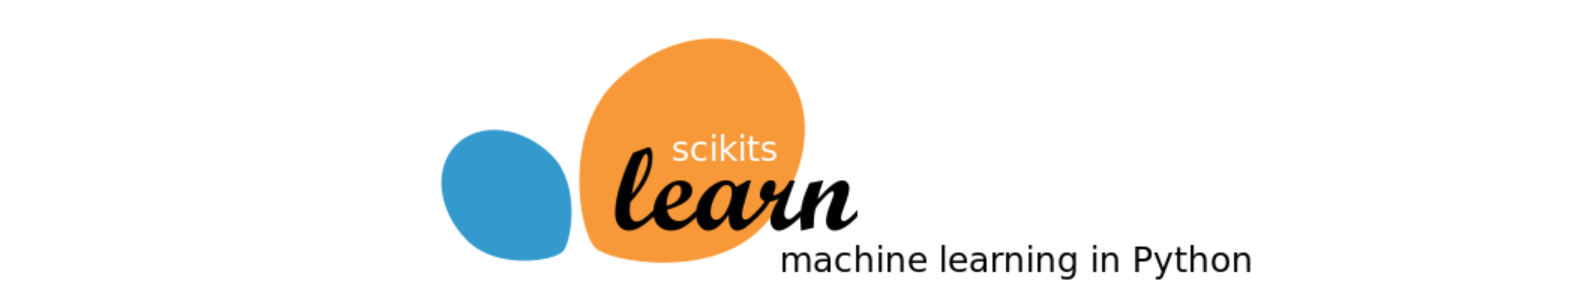

# Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Importing Libraries </li>
<li> Loading and Cleaning with Pandas</li>
<li> Handling Missing values</li>

<li> Scaling Numerical Features  </li>
<li> Encode Categorical Features  </li>
<li> Training Model</li>
<li> Evaluating Model</li>
<li> Making Prediction</li>
</ol>

# 0. Learning Objectives

For this test, we will use the Credit Card Approval dataset from the UCI Machine Learning Repository. Dataset has mixture of both numerical and categorical features with number of missing entries. The features of this dataset have been anonymized to protect the privacy, but some blog gives pretty good overview of the probable features. The probable features in a typical credit card application are `Gender, Age, Debt, Married, BankCustomer, EducationLevel, Ethnicity, YearsEmployed, PriorDefault, Employed, CreditScore, DriversLicense, Citizen, ZipCode, Income` and finally the `ApprovalStatus`. For your understanding map the features descriptions given here with respect to columns in the dataset.

Feature Information:

    A1:	b, a.
    A2:	continuous.
    A3:	continuous.
    A4:	u, y, l, t.
    A5:	g, p, gg.
    A6:	c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
    A7:	v, h, bb, j, n, z, dd, ff, o.
    A8:	continuous.
    A9:	t, f.
    A10:	t, f.
    A11:	continuous.
    A12:	t, f.
    A13:	g, p, s.
    A14:	continuous.
    A15:	continuous.
    A16: +,-         (class attribute)
    
  #### By the end of this lab, you should be able to predict whether an applicant will be getting credit card approval or not.

# 1. Importing Libraries 

Import all the necessary libraries here. If you don't remember all the libraries in this step, you may choose to import when required.

In [2]:
import numpy as np
import pandas as pd


# 2. Loading and Cleaning Data with Pandas


##  2.1.  Load data
- To load data, mention feature names given above in section 1 and display first five and last five records.

In [3]:
df= pd.read_csv('creditcard.txt', header= None , names=['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'YearsEmployed', 'PriorDefault',' Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'ZipCode', 'Income','ApprovalStatus'])
df.head()

Gender    Age   Debt Married BankCustomer EducationLevel Ethnicity  \
0      b  30.83  0.000       u            g              w         v   
1      a  58.67  4.460       u            g              q         h   
2      a  24.50  0.500       u            g              q         h   
3      b  27.83  1.540       u            g              w         v   
4      b  20.17  5.625       u            g              w         v   

   YearsEmployed PriorDefault  Employed  CreditScore DriversLicense Citizen  \
0           1.25            t         t            1              f       g   
1           3.04            t         t            6              f       g   
2           1.50            t         f            0              f       g   
3           3.75            t         t            5              t       g   
4           1.71            t         f            0              f       s   

  ZipCode  Income ApprovalStatus  
0   00202       0              +  
1   00043     560              +  
2   00280     824              +  
3   00100       3              +  
4   00120       0              +

In [4]:
df.tail()

Gender    Age    Debt Married BankCustomer EducationLevel Ethnicity  \
685      b  21.08  10.085       y            p              e         h   
686      a  22.67   0.750       u            g              c         v   
687      a  25.25  13.500       y            p             ff        ff   
688      b  17.92   0.205       u            g             aa         v   
689      b  35.00   3.375       u            g              c         h   

     YearsEmployed PriorDefault  Employed  CreditScore DriversLicense Citizen  \
685           1.25            f         f            0              f       g   
686           2.00            f         t            2              t       g   
687           2.00            f         t            1              t       g   
688           0.04            f         f            0              f       g   
689           8.29            f         f            0              t       g   

    ZipCode  Income ApprovalStatus  
685   00260       0              -  
686   00200     394              -  
687   00200       1              -  
688   00280     750              -  
689   00000       0              -

## 2.2.  Print summary of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9    Employed       690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


## 2.3. Check null values for all the colums in the dataset

In [6]:
df.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
 Employed         0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

## 2.4. Check datatypes of all the columns

In [7]:
df.dtypes

Gender             object
Age                object
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
 Employed          object
CreditScore         int64
DriversLicense     object
Citizen            object
ZipCode            object
Income              int64
ApprovalStatus     object
dtype: object

## 2.5 Cleaning data
- There are some columns which contains value as "?". Replace them with np.nan.

In [8]:
df['Gender'].unique()

array(['b', 'a', '?'], dtype=object)

In [9]:
df.replace('?', np.nan, inplace=True)


In [10]:
df.isnull().sum()

Gender            12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
 Employed          0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

## 2.6 Type conversion
- Some numerical features are not in expected types. Convert their types.

In [11]:
df[['Age','CreditScore','ZipCode','Income']]=df[['Age','CreditScore','ZipCode','Income']].astype(float)

In [12]:
df.dtypes

Gender             object
Age               float64
Debt              float64
Married            object
BankCustomer       object
EducationLevel     object
Ethnicity          object
YearsEmployed     float64
PriorDefault       object
 Employed          object
CreditScore       float64
DriversLicense     object
Citizen            object
ZipCode           float64
Income            float64
ApprovalStatus     object
dtype: object

# 3. Handling Missing Values

- Before handling missing value, store all the categorical data in `categorical_features` and numerical data in `numerical features`


- Print missing values of both categorical and numerical features before handling missing values

In [13]:
categorical_feature=df.select_dtypes(include='object')
categorical_feature.isnull().sum()

Gender            12
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
PriorDefault       0
 Employed          0
DriversLicense     0
Citizen            0
ApprovalStatus     0
dtype: int64

In [15]:
numerical_feature=df.select_dtypes(include='number')
numerical_feature.isnull().sum()

Age              12
Debt              0
YearsEmployed     0
CreditScore       0
ZipCode          13
Income            0
dtype: int64

## 3.1. Handling Missing values for Categorical variable
- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [18]:
from sklearn.impute import SimpleImputer
imputeC=SimpleImputer(missing_values=np.nan ,strategy="most_frequent")
categoricaldf=imputeC.fit_transform(categorical_feature)
categoricaldf=pd.DataFrame(data=categoricaldf,columns=categorical_feature.columns)
categoricaldf


Gender Married BankCustomer EducationLevel Ethnicity PriorDefault  \
0        b       u            g              w         v            t   
1        a       u            g              q         h            t   
2        a       u            g              q         h            t   
3        b       u            g              w         v            t   
4        b       u            g              w         v            t   
..     ...     ...          ...            ...       ...          ...   
685      b       y            p              e         h            f   
686      a       u            g              c         v            f   
687      a       y            p             ff        ff            f   
688      b       u            g             aa         v            f   
689      b       u            g              c         h            f   

     Employed DriversLicense Citizen ApprovalStatus  
0           t              f       g              +  
1           t              f       g              +  
2           f              f       g              +  
3           t              t       g              +  
4           f              f       s              +  
..        ...            ...     ...            ...  
685         f              f       g              -  
686         t              t       g              -  
687         t              t       g              -  
688         f              f       g              -  
689         f              t       g              -  

[690 rows x 10 columns]

In [19]:
categoricaldf.isnull().sum()

Gender            0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
PriorDefault      0
 Employed         0
DriversLicense    0
Citizen           0
ApprovalStatus    0
dtype: int64

## 3.2. Handling Missing values for numerical variable

- Use sklearn SimpleImputer to impute categorical values with most frequest values. 

- Check missing records after imputation

In [20]:
imputeC=SimpleImputer(missing_values=np.nan ,strategy="mean")
numericaldf=imputeC.fit_transform(numerical_feature)
numericaldf=pd.DataFrame(data=numericaldf,columns=numerical_feature.columns)
numericaldf


Age    Debt  YearsEmployed  CreditScore  ZipCode  Income
0    30.83   0.000           1.25          1.0    202.0     0.0
1    58.67   4.460           3.04          6.0     43.0   560.0
2    24.50   0.500           1.50          0.0    280.0   824.0
3    27.83   1.540           3.75          5.0    100.0     3.0
4    20.17   5.625           1.71          0.0    120.0     0.0
..     ...     ...            ...          ...      ...     ...
685  21.08  10.085           1.25          0.0    260.0     0.0
686  22.67   0.750           2.00          2.0    200.0   394.0
687  25.25  13.500           2.00          1.0    200.0     1.0
688  17.92   0.205           0.04          0.0    280.0   750.0
689  35.00   3.375           8.29          0.0      0.0     0.0

[690 rows x 6 columns]

In [21]:
numericaldf.isnull().sum()

Age              0
Debt             0
YearsEmployed    0
CreditScore      0
ZipCode          0
Income           0
dtype: int64

# 4. Scaling Numerical Features
- Use any scaling techniques to scale all the numerical features

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler =MinMaxScaler(feature_range=(0,1))
numeric=scaler.fit_transform(numericaldf)

In [24]:
ndf=pd.DataFrame(data=numeric, columns=numericaldf.columns)
ndf

Age      Debt  YearsEmployed  CreditScore  ZipCode   Income
0    0.256842  0.000000       0.043860     0.014925   0.1010  0.00000
1    0.675489  0.159286       0.106667     0.089552   0.0215  0.00560
2    0.161654  0.017857       0.052632     0.000000   0.1400  0.00824
3    0.211729  0.055000       0.131579     0.074627   0.0500  0.00003
4    0.096541  0.200893       0.060000     0.000000   0.0600  0.00000
..        ...       ...            ...          ...      ...      ...
685  0.110226  0.360179       0.043860     0.000000   0.1300  0.00000
686  0.134135  0.026786       0.070175     0.029851   0.1000  0.00394
687  0.172932  0.482143       0.070175     0.014925   0.1000  0.00001
688  0.062707  0.007321       0.001404     0.000000   0.1400  0.00750
689  0.319549  0.120536       0.290877     0.000000   0.0000  0.00000

[690 rows x 6 columns]

# 5. Encode Categorical data
- Since we are not aware of the type of categorical data, lets encode all features using OrdinalEncoder. If you are familiar with other encoding techniques, you may use them too.


- Use LabelEncoder to encode Target variable and store in variable `y`


- Concatenate Categorical and Numerical features together in single dataframe `X`


In [25]:
ordinaldata=categoricaldf.drop(["ApprovalStatus"],axis=1)
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
encoded_data = encoder.fit_transform(ordinaldata)
ordinaldf=pd.DataFrame(data=encoded_data,columns=ordinaldata.columns)
ordinaldf

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       1.0      1.0           0.0            12.0        7.0           1.0   
1       0.0      1.0           0.0            10.0        3.0           1.0   
2       0.0      1.0           0.0            10.0        3.0           1.0   
3       1.0      1.0           0.0            12.0        7.0           1.0   
4       1.0      1.0           0.0            12.0        7.0           1.0   
..      ...      ...           ...             ...        ...           ...   
685     1.0      2.0           2.0             4.0        3.0           0.0   
686     0.0      1.0           0.0             1.0        7.0           0.0   
687     0.0      2.0           2.0             5.0        2.0           0.0   
688     1.0      1.0           0.0             0.0        7.0           0.0   
689     1.0      1.0           0.0             1.0        3.0           0.0   

      Employed  DriversLicense  Citizen  
0          1.0             0.0      0.0  
1          1.0             0.0      0.0  
2          0.0             0.0      0.0  
3          1.0             1.0      0.0  
4          0.0             0.0      2.0  
..         ...             ...      ...  
685        0.0             0.0      0.0  
686        1.0             1.0      0.0  
687        1.0             1.0      0.0  
688        0.0             0.0      0.0  
689        0.0             1.0      0.0  

[690 rows x 9 columns]

In [26]:
targetdata=categoricaldf["ApprovalStatus"]
from sklearn.preprocessing import LabelEncoder
Lo=LabelEncoder()
y=Lo.fit_transform(targetdata)


In [27]:
alldf=pd.concat([ordinaldf,ndf],axis=1)
alldf['target']=y.tolist()
alldf

Gender  Married  BankCustomer  EducationLevel  Ethnicity  PriorDefault  \
0       1.0      1.0           0.0            12.0        7.0           1.0   
1       0.0      1.0           0.0            10.0        3.0           1.0   
2       0.0      1.0           0.0            10.0        3.0           1.0   
3       1.0      1.0           0.0            12.0        7.0           1.0   
4       1.0      1.0           0.0            12.0        7.0           1.0   
..      ...      ...           ...             ...        ...           ...   
685     1.0      2.0           2.0             4.0        3.0           0.0   
686     0.0      1.0           0.0             1.0        7.0           0.0   
687     0.0      2.0           2.0             5.0        2.0           0.0   
688     1.0      1.0           0.0             0.0        7.0           0.0   
689     1.0      1.0           0.0             1.0        3.0           0.0   

      Employed  DriversLicense  Citizen       Age      Debt  YearsEmployed  \
0          1.0             0.0      0.0  0.256842  0.000000       0.043860   
1          1.0             0.0      0.0  0.675489  0.159286       0.106667   
2          0.0             0.0      0.0  0.161654  0.017857       0.052632   
3          1.0             1.0      0.0  0.211729  0.055000       0.131579   
4          0.0             0.0      2.0  0.096541  0.200893       0.060000   
..         ...             ...      ...       ...       ...            ...   
685        0.0             0.0      0.0  0.110226  0.360179       0.043860   
686        1.0             1.0      0.0  0.134135  0.026786       0.070175   
687        1.0             1.0      0.0  0.172932  0.482143       0.070175   
688        0.0             0.0      0.0  0.062707  0.007321       0.001404   
689        0.0             1.0      0.0  0.319549  0.120536       0.290877   

     CreditScore  ZipCode   Income  target  
0       0.014925   0.1010  0.00000       0  
1       0.089552   0.0215  0.00560       0  
2       0.000000   0.1400  0.00824       0  
3       0.074627   0.0500  0.00003       0  
4       0.000000   0.0600  0.00000       0  
..           ...      ...      ...     ...  
685     0.000000   0.1300  0.00000       1  
686     0.029851   0.1000  0.00394       1  
687     0.014925   0.1000  0.00001       1  
688     0.000000   0.1400  0.00750       1  
689     0.000000   0.0000  0.00000       1  

[690 rows x 16 columns]

# 6. Training Model

## 6.1. Train test split
- Before training the model, split your data to train and test set. Keep your test size as 20%, and random_state value as 5. Also make sure that your test data contain equal number of data from both the clases.

In [33]:
from sklearn.model_selection import train_test_split
X= alldf.drop(["target"], axis=1)
Y= alldf.target
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5,stratify=alldf.target)


## 6.2 Train the model
- Use any three different algorithm to train your model. Make sure you specify the right parameters for each one of them.

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

# 7. Evaluating the model

- Use score method to check accuracy of all the models


- Build confusion matrix for all the model and visualize using heatmap.


- Find Precision, Recall and F1-score

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8405797101449275

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
Cm=confusion_matrix(y_test,y_pred)
Cm

array([[48, 13],
       [ 9, 68]], dtype=int64)

C:\Users\SdekeY\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


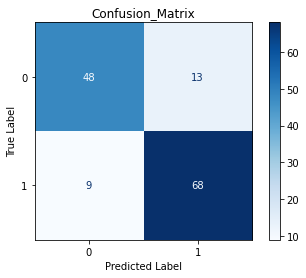

In [41]:
import matplotlib.pyplot as plt
matrix=plot_confusion_matrix(knn,X_test,y_test,cmap=plt.cm.Blues)
color='black'
matrix.ax_.set_title('Confusion_Matrix',color=color)
plt.xlabel('Predicted Label',color=color)
plt.ylabel('True Label',color=color)
plt.gcf().axes[0].tick_params(colors=color)
plt.gcf().axes[1].tick_params(colors=color)
plt.show()

In [40]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test,y_pred, average='micro')

0.8405797101449275

In [42]:
recall_score(y_test,y_pred, average='micro')

0.8405797101449275

In [48]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred, average='micro')

0.8405797101449275

# 8. Making Prediction
- Take any sample record from your training data and make prediction.

In [46]:
knn.predict([[1.0,1.0,0.0,12.0,7.0,1.0,1.0,0.0,0.0,0.256842,0.000000,0.043860,0.014925,0.1010,0.00000]])

C:\Users\SdekeY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [47]:
knn.predict([[0.0,1.0,0.0,10.0,3.0,1.0,1.0,0.0,0.0,0.675489,0.159286,0.106667,0.089552,0.0215,0.00560]])

C:\Users\SdekeY\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

# 9. Improve your model

- Use any technique to improve your model.

In [49]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fs= SelectKBest(score_func=f_classif,k=4)
x_select=fs.fit_transform(alldf,alldf.target)
x_select.shape

C:\Users\SdekeY\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


(690, 4)

In [55]:
a=x_select
b=alldf.target
X_train1,X_test1,y_train1,y_test1=train_test_split(a,b,test_size=0.2,random_state=5,stratify=alldf.target)

In [56]:
knn1=KNeighborsClassifier()
knn1.fit(X_train1,y_train1)

KNeighborsClassifier()

In [63]:
y_pred1=knn1.predict(X_test1)
y_pred1

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0], dtype=int64)

In [64]:
accuracy_score(y_test1,y_pred1)

1.0

In [65]:
precision_score(y_test1,y_pred1,average='micro')

1.0